# Project: WeRateDog Data Wrangling 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#accessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing, Analysis and Visualization Data</a></li>

</ul>

<a id='intro'></a>
## Introduction

Data wrangling is really important before we have a decent data analysis while we are holding large data resources. 

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

Through assessing and cleaning the data, I will come up with some interesting visualization and conclusion. 


<a id='gathering'></a>
# Gathering Data

In [3]:
#Import all packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import seaborn as sns



In [4]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Download tweet image predictions TSV using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    

In [6]:
# Import the tweet image predictions TSV file into a DataFrame and read it
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

    

In [7]:
with open('tweet-json.txt', encoding='utf-8') as file:
    print(len(file.readlines()))

2354


In [8]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])



<a id='accessing'></a>
# Accessing Data

## Visual Accessment

In [9]:
# Visually assess twitter_archive
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
# Visually assess img_df
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
# Visually assess status_df
status_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [12]:
# Check if there are any erroneous datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [14]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Sephie        1
Lizzie        1
Clifford      1
Brian         1
Shawwn        1
Name: name, Length: 957, dtype: int64

In [17]:
# Check if there are any erroneous datatypes
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
sum(img_df['tweet_id'].duplicated())

0

In [19]:
img_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
lawn_mower              1
bald_eagle              1
silky_terrier           1
sundial                 1
walking_stick           1
Name: p1, Length: 378, dtype: int64

In [20]:
img_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
lesser_panda            1
cowboy_hat              1
sweatshirt              1
china_cabinet           1
sombrero                1
Name: p2, Length: 405, dtype: int64

In [21]:
img_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
assault_rifle          1
seashore               1
park_bench             1
barber_chair           1
rock_crab              1
Name: p3, Length: 408, dtype: int64

In [22]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   display_text_range  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [23]:
sum(status_df['tweet_id'].duplicated())

0

In [24]:
status_df.sort_values(['favorite_count'], ascending=False)

,tweet_id,retweet_count,favorite_count,display_text_range
412,822872901745569793,48265,132810,"[0, 87]"
1037,744234799360020481,79515,131075,"[0, 91]"
65,879415818425184262,45849,107956,"[0, 82]"
533,807106840509214720,56625,107015,"[0, 61]"
134,866450705531457537,32883,106827,"[0, 106]"
...,...,...,...,...
883,760153949710192640,38,0,"[0, 126]"
478,815745968457060357,4797,0,"[0, 140]"
475,816014286006976512,6154,0,"[0, 109]"
474,816062466425819140,1207,0,"[0, 140]"


## Oberservations

### Quality

1. "twitter_archive_df" has 2356 rows while the "image_predictions_df" has only 2075 rows, probably due to retweets and missing photos.

2. tweet_id is an int (applies to all tables)

3. The timestamp column is in string format

4. dog names: some dogs have 'None' as a name, or 'a', or 'an.'

5. this dataset includes retweets, which means there is duplicated data

6. strange unexpected values in rating_denominator

7. strange unexpected values in rating_numerator

8. p1, p2 and p3 columns have invalid data, and those three columns aren't consistent, and I have to create two more columns to adjust the issue



### Tidiness 

1. All three files have common tweet_id column, which can combine those three to one dataframe.

2. 4 different columns (doggo, floofer, pupper, and puppo) on dog stages should be combine in only one column.

3. Drop unnecessary columns that will not use in the analysis

<a id='cleaning'></a>
# Cleaning Data

In [25]:
# create copies of the dataframes for cleaning
archive_clean = twitter_archive.copy()
predictions_clean = img_df.copy()
json_data_clean = status_df.copy()

#### Define 


1. Merge the clean versions of twitter_archive, img_df, and status_df dataframes Correct the dog types
2. Create one column for the various dog types: doggo, floofer, pupper, puppo.
3. Delete retweets. Remove columns no longer needed:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
4. Change tweet_id from an integer to a string
5. Change the timestamp to correct datetime format
6. Correct naming issues
7. Standardize dog ratings
8. Creating breed and confidence columns in Twitter dataframe 

#### 1.Merge the clean versions of twitter_archive, img_df, and status_df dataframes Correct the dog types

In [26]:
# Code 
from functools import reduce
dfs = [archive_clean, predictions_clean, json_data_clean]
twitter= reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dfs)

In [27]:
# Test 
#View first few lines of new twitter dataframe to ensure the columns have merged
twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,"[0, 121]"
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,"[0, 79]"
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]"


In [28]:
#View info of new twitter dataframe to ensure the columns have merged
#Test 
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [29]:
# View info of new twitter dataframe to ensure the columns have merged
#Test 
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

#### 2. Create one column for the various dog types: doggo, floofer, pupper, puppo. 

In [30]:
#Code 
# Extract the text from the columns into the new dog_type colunn
twitter['dog_type'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [31]:
# Testing
twitter[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
1013,NaN,None,None,None,None
722,doggo,doggo,None,pupper,None
749,NaN,None,None,None,None
1094,NaN,None,None,None,None
1138,NaN,None,None,None,None
1312,NaN,None,None,None,None
924,doggo,None,None,None,None
2031,NaN,None,None,None,None
911,NaN,None,None,None,None
670,NaN,None,None,None,None


In [32]:
# Testing Continue
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]",NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]",NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,"[0, 121]",NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,"[0, 79]",NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]",NaN


In [33]:
twitter.dog_type.value_counts()

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_type, dtype: int64

#### 3. Delete retweets. Remove columns no longer needed:in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [34]:
#Code 
#Keep the columns where retweeted_status_id is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

In [35]:
#Test 
# Verify no non-null entires are left
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [36]:
#Code 
# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                        'in_reply_to_status_id', 
                        'in_reply_to_user_id',
                       ], 
                       axis=1)

In [37]:
#Test
# Test to check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   int64  
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

#### 4. Change tweet_id from an integer to a string

In [38]:
#Code 
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

In [39]:
#Test 
#  Test to check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   int64  
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

#### 5 Change the timestamp to correct datetime format

In [40]:
#Code 
#Remove the time zone from the 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [41]:
#Code
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [42]:
# Test 
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]",NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]",NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,"[0, 121]",NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,"[0, 79]",NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]",NaN


#### 6. Correct Naming Issues

In [43]:
#Code 
twitter.name = twitter.name.str.replace('^[a-z]+', 'None')
twitter['name'].value_counts()

None       644
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Gordon       1
Butters      1
Grizzie      1
Cora         1
Shawwn       1
Name: name, Length: 914, dtype: int64

In [44]:
# Test 
twitter['name'].sample(10)


1960        None
893     Storkson
1013     Calbert
300       Brutus
963        Sugar
1995        None
1296        Luca
50          None
1195     Maximus
323         Cash
Name: name, dtype: object

#### 7. Standardize dog ratings. All values in the rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.

In [45]:
#Code 
twitter.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [46]:
#Code 
twitter.drop(['rating_denominator'], axis = 1, inplace = True)
twitter.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [47]:
# Test 
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]",NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]",NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,"[0, 121]",NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,"[0, 79]",NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]",NaN


#### 8. Creating breed and confidence columns in Twitter dataframe 

1. Create two new columns in predictions called breed and confidence: check each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.
2. Copy the associated confidence level into the new confidence column.
3. For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.

In [48]:
# Source:    https://code.i-harness.com/en/q/19c9fbc
#Code 

# setup the conditions for selection
conditions = [(twitter['p1_dog'] == True),
              (twitter['p2_dog'] == True),
              (twitter['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [twitter['p1'], 
                 twitter['p2'],
                 twitter['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [twitter['p1_conf'], 
                      twitter['p2_conf'], 
                      twitter['p3_conf']]

# select the predicted breed based on the first successful condition
twitter['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
twitter['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [49]:
#Test 
twitter.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,...,False,banana,0.076110,False,8853,39467,"[0, 85]",NaN,none,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,...,True,papillon,0.068957,True,6514,33819,"[0, 138]",NaN,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,...,True,kelpie,0.031379,True,4328,25461,"[0, 121]",NaN,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,...,True,spatula,0.040836,False,8964,42908,"[0, 79]",NaN,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,...,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]",NaN,basset,0.555712


In [50]:
#Code 
# change data type for the confidence interval to a rounded, whole integer (%)
twitter.confidence = (twitter.confidence * 100).astype(int)



In [51]:
#Test 
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating              1994 non-null   int64         
 6   name                1994 non-null   object        
 7   doggo               1994 non-null   object        
 8   floofer             1994 non-null   object        
 9   pupper              1994 non-null   object        
 10  puppo               1994 non-null   object        
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  p1                  1994 non-null   object        
 1

In [52]:
#Test 
twitter.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,...,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,dog_type,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,...,False,banana,0.076110,False,8853,39467,"[0, 85]",NaN,none,0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,...,True,papillon,0.068957,True,6514,33819,"[0, 138]",NaN,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,...,True,kelpie,0.031379,True,4328,25461,"[0, 121]",NaN,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,...,True,spatula,0.040836,False,8964,42908,"[0, 79]",NaN,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,...,True,German_short-haired_pointer,0.175219,True,9774,41048,"[0, 138]",NaN,basset,55


<a id='storing'></a>
# Storing, Analysis and Visualization Data

In [53]:
# Storing Data
twitter.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

### Simple Statistics

In [55]:
twitter[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1994.000000,1994.000000,1994.000000,1994.000000
mean,12.280843,2766.753260,8895.725677,46.068205
std,41.497718,4674.698447,12213.193181,33.827554
min,0.000000,16.000000,81.000000,0.000000
25%,10.000000,624.750000,1982.000000,14.000000
50%,11.000000,1359.500000,4136.000000,45.000000
75%,12.000000,3220.000000,11308.000000,77.000000
max,1776.000000,79515.000000,132810.000000,99.000000


### Plot

In [56]:
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


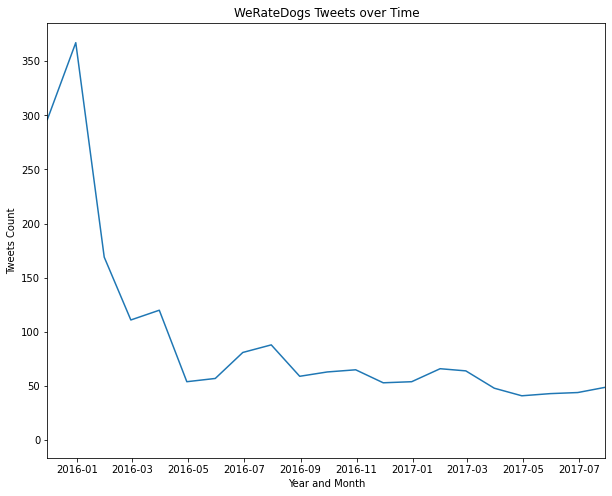

In [57]:
monthly_tweets = twitter.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]


monthly_tweets.head()
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]) 

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('WeRateDogs Tweets over Time');

C:\Users\xuwen\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


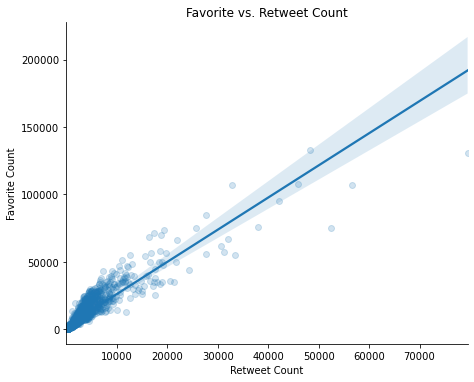

In [58]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.

In [59]:
# Visualizing the most popular dog breed
twitter['dog_type'].value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

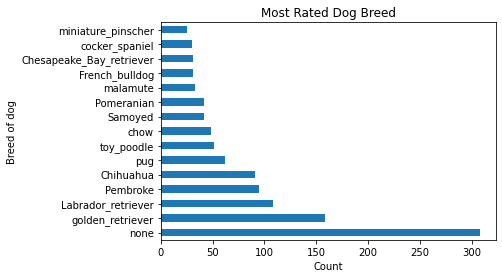

In [60]:
# Histogram to visualize dog breeeds
dog_breed = twitter.groupby('breed').filter(lambda x: len(x) >= 25)

dog_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

We found Most rated dog bread is golden_retriever(ignoring the None label)

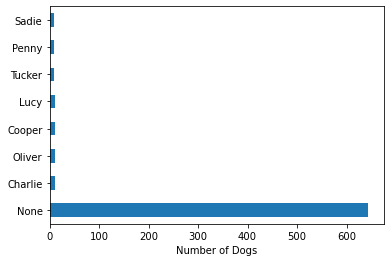

In [61]:
# Visualizing the most popular dog names
twitter.name.value_counts()[0:8].plot(kind='barh')
plt.title=('Most Common Dog Names')
plt.xlabel("Number of Dogs");

In [62]:
twitter.name.value_counts()

None       644
Charlie     11
Oliver      10
Cooper      10
Lucy        10
          ... 
Gordon       1
Butters      1
Grizzie      1
Cora         1
Shawwn       1
Name: name, Length: 914, dtype: int64

The three most popular dog names are Charlie, Oliver, Lucy and Copper, dispite the None name.